<a href="https://colab.research.google.com/github/mirandalshen/NLP-Analysis-of-Erowid-Self-Reports/blob/main/Clustering_and_Distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from umap import UMAP
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.integrate import simps
import matplotlib.colors as mcolors
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import spacy
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# Load report csv
df = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/Massive DF Combined Effect Index.csv')

In [ ]:
df = df.rename(columns={'substance': 'source'})

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from umap import UMAP
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.integrate import simps
import matplotlib.colors as mcolors
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import os
import html
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
def clean_html(text):
    # Replace HTML entities with their corresponding characters
    cleaned_text = html.unescape(text)

    # Replace specific HTML tags, such as "<BR>"
    cleaned_text = cleaned_text.replace('<br>', '').replace('<BR>', '').replace('&lt;BR&gt;', '').replace('&lt;br&gt;', '')

    # Remove newline characters without adding extra spaces
    cleaned_text = cleaned_text.replace('\n', '')

    # Remove <!
    cleaned_text = cleaned_text.replace('<!', '')

    # Remove --
    cleaned_text = cleaned_text.replace('--', '')

    # Remove >
    cleaned_text = cleaned_text.replace('>', '')

    # Remove all punctuation except for single dashes
    cleaned_text = ''.join([char for char in cleaned_text if char not in string.punctuation or char == '-'])

    # Convert the text to lowercase
    cleaned_text = cleaned_text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stop_words])

    return cleaned_text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['report'] = df['report'].apply(clean_html)
df

,Unnamed: 0,report,source,cleaned report,no stop words report,polarity,analysis,subjectivity,indication - hal,condone - dist,...,graven - amp,restored - sup,coloring - dist,splendor - dist,pace - sup,contradict - sup,alteration - dist,artistic - geo,single - sup,electrolyte - geo
0,0,let start saying completely clean never high n...,LSD,"['Let', 'me', 'start', 'by', 'saying', 'that',...",Let start saying I completely clean Never high...,0.105369,Positive,0.517731,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ericeira classic surf town grand lisbon area p...,LSD,"['I', 'was', 'in', 'Ericeira', 'a', 'classic',...",I Ericeira classic surf town grand Lisbon area...,0.165060,Positive,0.504442,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,erowidnoteunconfirmedinjuryreportbrbrme couple...,LSD,"['EROWIDNOTEUNCONFIRMEDINJURYREPORTbrbrMe', 'a...",EROWIDNOTEUNCONFIRMEDINJURYREPORTbrbrMe couple...,0.124600,Positive,0.539534,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,background brmy experience substances minimal ...,LSD,"['Background', 'brMy', 'experience', 'with', '...",Background brMy experience substances minimal ...,0.159044,Positive,0.538799,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,read bad trip stories say holy shiti think def...,LSD,"['I', 'just', 'read', 'some', 'bad', 'trip', '...",I read bad trip stories I say holy shitI think...,0.021428,Positive,0.531091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,must begin background 18 years old 61 weigh 13...,2C-E,"['I', 'must', 'begin', 'with', 'some', 'backgr...",I must begin background I 18 years old 61 weig...,0.120762,Positive,0.518966,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,2496,went hard haunted mansion last halloween decid...,2C-E,"['I', 'went', 'to', 'HARD', 'Haunted', 'Mansio...",I went HARD Haunted Mansion last Halloween dec...,0.056637,Positive,0.503304,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,2497,took 16mg 2c-ehydrochloride presume water 115 ...,2C-E,"['I', 'took', '16mg', 'of', '2CEhydrochloride'...",I took 16mg 2CEhydrochloride I presume water 1...,0.140666,Positive,0.517883,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,2498,heard good things 2c-e lsd combo seeing much i...,2C-E,"['I', 'have', 'heard', 'good', 'things', 'abou...",I heard good things combo seeing much informat...,0.168918,Positive,0.487776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df[['source', 'report']]

In [ ]:
# Make single list of all reports, for input to TFIDF function
text = []
for i in np.arange(len(df)):
    text.append(df["report"][i])

In [ ]:
# Lemmatize all text

nlp = spacy.load('en_core_web_sm')

# Define a lemmatization function using spaCy
def lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])


# Check if lemmatized file exists
if os.path.exists('lemmatized_text.csv'):
    # Load lemmatized file
    print('Loading lemmatized text from file')
    lemmatized_text = pd.read_csv('lemmatized_text.csv')['text'].tolist()
else:
    # Perform lemmatization and save to file
    print('Lemmatizing – will take a while')
    lemmatized_text = [lemmatize(t) for t in text]
    df_lt = pd.DataFrame({'text': lemmatized_text})
    df_lt.to_csv('lemmatized_text.csv', index=False)

Loading lemmatized text from file


In [ ]:
# Calculate TF-IDF values.

# When you set min_df=0.01, it means that a term must be present in at least 1% of the documents
# in the corpus to be included in the resulting term-document matrix.
# Any term that appears in less than 1% of the documents will be ignored.
# Can adjust this parameter to make dataset more computable.
tfidf = TfidfVectorizer(min_df=0.001)

x = tfidf.fit_transform(lemmatized_text)
df_tfidf = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf['substance_label'] = pd.Series(df['source'])
df_just_vals = df_tfidf.iloc[:, :-2]

In [ ]:
# Perform UMAP to get 3-D embedding of TF-IDF data
df_tfidf['substance_label_encoded'] = pd.factorize(df_tfidf['substance_label'])[0]

mapped = df_tfidf.copy()
mapped['substance_label'] = mapped['substance_label_encoded']
mapped.drop('substance_label_encoded', axis=1, inplace=True)

reducer = umap.UMAP(random_state=42, n_components=3)
combined_data = df_just_vals.values
scaled_combined_data = StandardScaler().fit_transform(combined_data)
embedding = reducer.fit_transform(scaled_combined_data)
embedding.shape

(2500, 3)

In [ ]:
drug_strings = df_tfidf['substance_label'].unique()

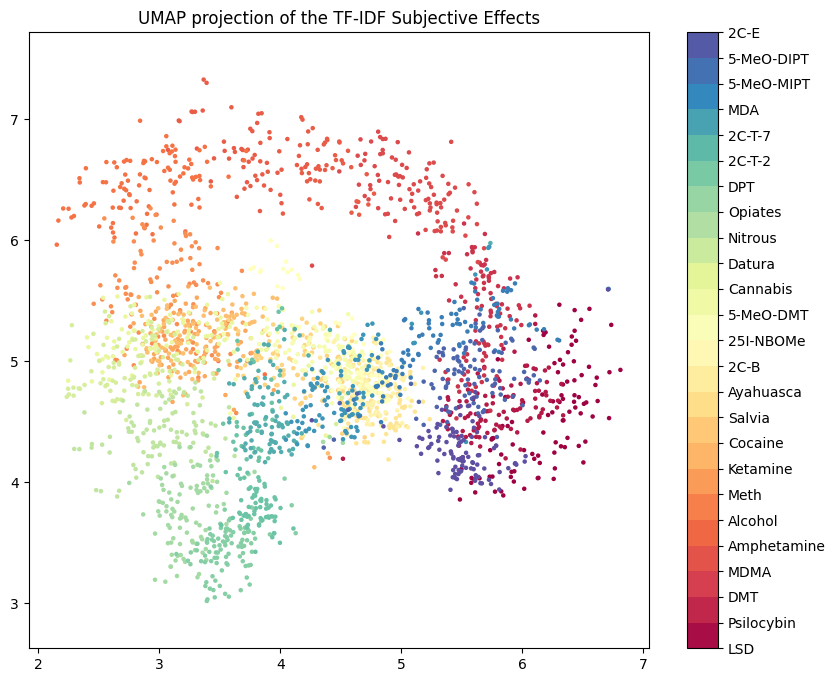

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 8))

# Plot the embedding
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=mapped.substance_label, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')

# Customize the colorbar
colorbar = plt.colorbar(scatter, boundaries=np.arange(len(drug_strings)), ticks=np.arange(len(drug_strings)))
colorbar.set_ticklabels(drug_strings)

# Set the title
plt.title('UMAP projection of the TF-IDF Subjective Effects', fontsize=12)

# Display the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats

# Step 1: Assign Clusters
num_clusters = 6  # Specify the number of clusters
umap_embeddings = embedding  # Assuming the UMAP embeddings are stored in the 'embedding' array

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_embeddings)

# Step 2: Identify Subjective Effect Words
subjective_effect_words = ['visual enhancement', 'visual suppression', 'visual distortion', 'visual geometric patterns', 'auditory enhancement', 'auditory suppression', 'auditory distortion', 'tactile distortion', 'tactile enhancement', 'tactile suppression', 'gustatory ehancement', 'gustatory suppression', 'gustatory distortion', 'olfactory enhancement', 'olfactory suppression', 'olfactory distortion', 'sensory overload', 'synesthesia', 'insight', 'cognitive enhancement', 'cognitive suppression', 'cognitive distortion', 'enhanced alertness', 'suppressed alertness', 'thought disorganization', 'music appreciation', 'empathy', 'affection', 'sociability enhancement', 'euphoria', 'dysphoria', 'panic', 'paranoia', 'derealization', 'sensed presence', 'interconnectedness', 'ego dissolution', 'nature relatedness']  # List of subjective effect words

# Step 3: Tokenize the text and extract unique words as keywords
keywords = set()
for report in df['report']:
    words = report.split()
    keywords.update(words)
keywords = sorted(list(keywords))

from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from functools import partial

# Step 4: Calculate Subjective Effect Frequencies

effect_frequencies = pd.DataFrame(columns=subjective_effect_words)
total_drugs_in_cluster = len(df) // num_clusters

keywords_set = set(keywords)  # Convert keywords to a set for faster membership checking

def process_report(report):
    word_counts = Counter(report.split())
    keyword_counts = {word: word_counts.get(word, 0) for word in keywords_set}
    return keyword_counts

def calculate_effect_frequencies(i):
    cluster_df = df[cluster_labels == i]
    reports = cluster_df['report']

    # Tokenize the text and count keyword frequencies in parallel
    with ThreadPoolExecutor() as executor:
        keyword_frequencies = pd.DataFrame.from_records(executor.map(process_report, reports), index=cluster_df.index)

    # Calculate subjective effect frequencies
    for word in subjective_effect_words:
        word_indices = [keywords.index(keyword) for keyword in keywords if word in keyword]
        if len(word_indices) > 0:
            effect_frequencies.loc[i, word] = (keyword_frequencies.iloc[:, word_indices].sum(axis=1) > 0).sum() / total_drugs_in_cluster

# Calculate effect frequencies for each cluster in parallel
with ThreadPoolExecutor() as executor:
    executor.map(calculate_effect_frequencies, range(num_clusters))

# Step 5: Visualize Differences
print("Subjective Effect Frequencies:")
print(effect_frequencies)

# Rest of the code for visualization and comparison...

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Subjective Effect Frequencies:
  visual enhancement visual suppression visual distortion  \
3                NaN                NaN               NaN   
2                NaN                NaN               NaN   
0                NaN                NaN               NaN   
1                NaN                NaN               NaN   
4                NaN                NaN               NaN   
5                NaN                NaN               NaN   

  visual geometric patterns auditory enhancement auditory suppression  \
3                       NaN                  NaN                  NaN   
2                       NaN                  NaN                  NaN   
0                       NaN                  NaN                  NaN   
1                       NaN                  NaN                  NaN   
4                       NaN                  NaN                  NaN   
5                       NaN                  NaN                  NaN   

  auditory distortion tactile

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

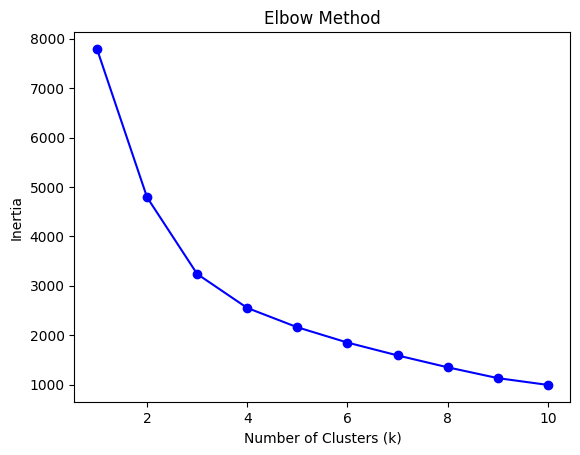

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have the UMAP embeddings stored in 'umap_embeddings'

# Step 1: Determine the optimal number of clusters using the elbow method
inertias = []
k_values = range(1, 11)  # Range of k values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(umap_embeddings)
    inertias.append(kmeans.inertia_)

# Step 2: Plot the elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


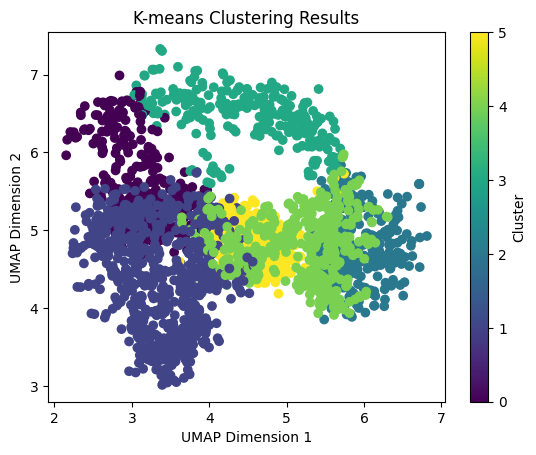

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have the UMAP embeddings stored in 'umap_embeddings'

# Step 1: Assign Clusters
num_clusters = 6  # Specify the number of clusters

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_embeddings)

# Step 2: Plot the clusters
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have the UMAP embeddings stored in 'umap_embeddings'
# Assuming the DataFrame containing the class labels is named 'df_tfidf'

# Step 1: Assign Clusters
num_clusters = 6  # Specify the number of clusters

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_embeddings)

# Step 2: Determine the most frequent cluster for each drug
drug_frequencies = df_tfidf['substance_label_encoded'].value_counts()
most_frequent_cluster = cluster_labels.copy()

for drug_class in drug_frequencies.index:
    drug_indices = np.where(df_tfidf['substance_label_encoded'] == drug_class)[0]
    drug_cluster_counts = np.bincount(cluster_labels[drug_indices])
    most_frequent_cluster[drug_indices] = np.argmax(drug_cluster_counts)

# Step 3: Print unique classes in each cluster
for cluster in range(num_clusters):
    cluster_indices = np.where(most_frequent_cluster == cluster)[0]
    cluster_classes = df_tfidf.loc[cluster_indices, 'substance_label'].unique()
    print(f"Cluster {cluster+1} contains the following classes: {cluster_classes}")

Cluster 1 contains the following classes: ['Alcohol' 'Meth' 'Ketamine' 'Cocaine']
Cluster 2 contains the following classes: ['5-MeO-DMT' 'Cannabis' 'Datura' 'Nitrous' 'Opiates' 'DPT' '2C-T-2'
 '2C-T-7']
Cluster 3 contains the following classes: ['LSD' 'Psilocybin' 'DMT']
Cluster 4 contains the following classes: ['MDMA' 'Amphetamine']
Cluster 5 contains the following classes: ['MDA' '5-MeO-MIPT' '5-MeO-DIPT' '2C-E']
Cluster 6 contains the following classes: ['Salvia' 'Ayahuasca' '2C-B' '25I-NBOMe']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Step 1: Create a dictionary to store the count of subjective effect words for each cluster and drug combination
cluster_effect_counts = {}

# Step 2-5: Iterate through each row, count the subjective effect words for each cluster and drug combination
for index, row in df.iterrows():
    report = row['report']
    drug_class = row['source']
    cluster = most_frequent_cluster[index]  # Assuming you have the 'most_frequent_cluster' array

    if cluster not in cluster_effect_counts:
        cluster_effect_counts[cluster] = {}

    if drug_class not in cluster_effect_counts[cluster]:
        cluster_effect_counts[cluster][drug_class] = 0

    for word in subjective_effect_words:
        if word in report:
            cluster_effect_counts[cluster][drug_class] += 1

# Step 6: Calculate relative frequencies and print the results
for cluster, drug_counts in cluster_effect_counts.items():
    print(f"Cluster {cluster+1}:")
    for drug, count in drug_counts.items():
        total_count = sum(drug_counts.values())
        relative_frequency = count / total_count
        print(f"  - {drug}: {relative_frequency}")

Cluster 3:
  - LSD: 0.4247787610619469
  - Psilocybin: 0.26548672566371684
  - DMT: 0.30973451327433627
Cluster 4:
  - MDMA: 0.5784313725490197
  - Amphetamine: 0.4215686274509804
Cluster 1:
  - Alcohol: 0.12408759124087591
  - Meth: 0.32116788321167883
  - Ketamine: 0.25547445255474455
  - Cocaine: 0.29927007299270075
Cluster 6:
  - Salvia: 0.15695067264573992
  - Ayahuasca: 0.22869955156950672
  - 2C-B: 0.2600896860986547
  - 25I-NBOMe: 0.3542600896860987
Cluster 2:
  - 5-MeO-DMT: 0.12956810631229235
  - Cannabis: 0.13953488372093023
  - Datura: 0.06312292358803986
  - Nitrous: 0.07641196013289037
  - Opiates: 0.12956810631229235
  - DPT: 0.17940199335548174
  - 2C-T-2: 0.16943521594684385
  - 2C-T-7: 0.11295681063122924
Cluster 5:
  - MDA: 0.23963133640552994
  - 5-MeO-MIPT: 0.28110599078341014
  - 5-MeO-DIPT: 0.1935483870967742
  - 2C-E: 0.2857142857142857


In [ ]:
# Step 1: Create a dictionary to store the frequency of subjective effect words for each cluster and effect word
cluster_effect_frequencies = {}

# Step 2-5: Iterate through each row, count the subjective effect words for each cluster and effect word
for index, row in df.iterrows():
    report = row['report']
    drug_class = row['source']
    cluster = most_frequent_cluster[index]  # Assuming you have the 'most_frequent_cluster' array

    if cluster not in cluster_effect_frequencies:
        cluster_effect_frequencies[cluster] = {}

    for word in subjective_effect_words:
        if word in report:
            if word not in cluster_effect_frequencies[cluster]:
                cluster_effect_frequencies[cluster][word] = 0
            cluster_effect_frequencies[cluster][word] += 1

# Step 6: Print the frequencies of subjective effect words within each cluster, sorted from biggest to smallest
for cluster, effect_frequencies in cluster_effect_frequencies.items():
    sorted_effects = sorted(effect_frequencies.items(), key=lambda x: x[1], reverse=True)
    print(f"Cluster {cluster+1}:")
    for effect, frequency in sorted_effects:
        print(f"  - {effect}: {frequency}")

Cluster 3:
  - panic: 36
  - euphoria: 22
  - insight: 19
  - paranoia: 14
  - visual distortion: 6
  - empathy: 6
  - sensory overload: 3
  - synesthesia: 3
  - sensed presence: 2
  - ego dissolution: 1
  - affection: 1
Cluster 4:
  - euphoria: 43
  - panic: 24
  - empathy: 10
  - paranoia: 10
  - insight: 6
  - affection: 4
  - sensory overload: 2
  - interconnectedness: 1
  - music appreciation: 1
  - visual distortion: 1
Cluster 1:
  - euphoria: 44
  - panic: 40
  - paranoia: 30
  - insight: 11
  - visual distortion: 5
  - empathy: 4
  - dysphoria: 1
  - sensory overload: 1
  - affection: 1
Cluster 6:
  - euphoria: 58
  - panic: 57
  - insight: 36
  - paranoia: 20
  - empathy: 17
  - visual distortion: 11
  - synesthesia: 7
  - music appreciation: 5
  - dysphoria: 4
  - affection: 3
  - visual enhancement: 2
  - auditory distortion: 1
  - interconnectedness: 1
  - sensory overload: 1
Cluster 2:
  - euphoria: 78
  - panic: 71
  - insight: 59
  - visual distortion: 27
  - paranoia: 2

In [ ]:
dmt = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled DMT GPT Finished Final with Percentages Combined')
psilo = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Psilocybin GPT Finished Final with Percentages Combined')
ket = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Ketamine GPT Finished Final with Percentages Combined')
coke = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Cocaine GPT Finished Final with Percentages Combined')
meth = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Meth GPT Finished Final with Percentages Combined')
salvia = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Salvia GPT Finished Final with Percentages Combined')
cb2 = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 2C-B GPT Finished Final with Percentages Combined')
ce2 = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 2C-E GPT Finished Final with Percentages Combined')
cannabis = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Cannabis GPT Finished Final with Percentages Combined')
dpt = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled DPT GPT Finished Final with Percentages Combined')
ct22 = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 2C-T-2 GPT Finished Final with Percentages Combined')
mda = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled MDA GPT Finished Final with Percentages Combined')
meomipt = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 5-MeO-MIPT GPT Finished Final with Percentages Combined')
meodmt = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 5-MeO-DMT GPT Finished Final with Percentages Combined')
meodipt = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 5-MeO-DIPT GPT Finished Final with Percentages Combined')
alc = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Alcohol GPT Finished Final with Percentages Combined')
amph = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Amphetamine GPT Finished Final with Percentages Combined')
aya = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Ayahuasca GPT Finished Final with Percentages Combined')
lsd = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled LSD GPT Finished Final with Percentages Combined')
mdma = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled MDMA GPT Finished Final with Percentages Combined')
dxm = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled DXM GPT Finished Final with Percentages Combined')
nbome = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 25I-NBOMe GPT Finished Final with Percentages Combined')
dat = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Datura GPT Finished Final with Percentages Combined')
nit = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Nitrous Oxide GPT Finished Final with Percentages Combined')
opi = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled Opiates GPT Finished Final with Percentages Combined')
ct27 = pd.read_csv('drive/My Drive/Silver Lab/2022/Erowid Project/GPT/Sampled 2C-T-7 GPT Finished Final with Percentages Combined')

from umap.layouts import optimize_layout_generic
dmt['class'] = 'DMT'
psilo['class'] = 'Psilocybin'
ket['class'] = 'Ketamine'
coke['class'] = 'Cocaine'
meth['class'] = 'Meth'
salvia['class'] = 'Salvia'
cb2['class'] = '2C-B'
ce2['class'] = '2C-E'
cannabis['class'] = 'Cannabis'
dpt['class'] = 'DPT'
ct22['class'] = '2C-T-2'
mda['class'] = 'MDA'
meomipt['class'] = '5-MeO-MIPT'
meodmt['class'] = '5-MeO-DMT'
meodipt['class'] = '5-MeO-DIPT'
alc['class'] = 'Alcohol'
amph['class'] = 'Amphetamine'
aya['class'] = 'Ayahuasca'

lsd['class'] = 'LSD'
mdma['class'] = 'MDMA'
dxm['class'] = 'DXM'
nbome['class'] = '25I-NBOme'
dat['class'] = 'Datura'
nit['class'] = 'Nitrous Oxide'
opi['class'] = 'Opiates'
ct27['class'] = '2C-T-7'

df = pd.concat([dmt, psilo, ket, coke, meth, salvia, cb2, ce2, cannabis, dpt, ct22, mda, meomipt, meodmt, meodipt, alc, amph, aya, lsd, mdma, dxm, nbome, dat, nit, opi, ct27])
df.reset_index(drop=True, inplace=True)
df = df.iloc[:,6:]
df = df.drop('count',axis=1)
df = df.drop('Unnamed: 0.3',axis=1)
df

,visual enhancement,visual suppression,visual distortion,visual geometric patterns,auditory enhancement,auditory suppression,auditory distortion,tactile distortion,tactile enhancement,tactile suppression,...,dysphoria,panic,paranoia,derealization,sensed presence,interconnectedness,ego dissolution,nature relatedness,none of the above,class
0,0.080000,0.016000,0.192000,0.040000,0.016000,0.000000,0.008000,0.016000,0.016000,0.008000,...,0.032000,0.024000,0.064000,0.048000,0.128000,0.032000,0.104000,0.008000,0.248000,DMT
1,0.025478,0.019108,0.127389,0.044586,0.000000,0.000000,0.000000,0.006369,0.025478,0.000000,...,0.019108,0.012739,0.012739,0.057325,0.082803,0.063694,0.178344,0.025478,0.273885,DMT
2,0.107143,0.000000,0.178571,0.035714,0.000000,0.000000,0.071429,0.000000,0.000000,0.035714,...,0.000000,0.035714,0.000000,0.142857,0.035714,0.000000,0.142857,0.035714,0.178571,DMT
3,0.065217,0.021739,0.173913,0.065217,0.021739,0.021739,0.000000,0.021739,0.000000,0.021739,...,0.043478,0.000000,0.000000,0.260870,0.152174,0.043478,0.195652,0.043478,0.086957,DMT
4,0.031579,0.052632,0.168421,0.000000,0.021053,0.042105,0.031579,0.021053,0.052632,0.000000,...,0.042105,0.052632,0.063158,0.031579,0.010526,0.010526,0.094737,0.042105,0.336842,DMT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,0.121951,0.024390,0.121951,0.024390,0.000000,0.000000,0.000000,0.024390,0.000000,0.012195,...,0.024390,0.024390,0.024390,0.024390,0.012195,0.012195,0.121951,0.036585,0.256098,2C-T-7
2596,0.066667,0.000000,0.177778,0.022222,0.000000,0.000000,0.000000,0.088889,0.022222,0.022222,...,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.022222,0.244444,2C-T-7
2597,0.014925,0.014925,0.194030,0.014925,0.014925,0.014925,0.000000,0.014925,0.014925,0.000000,...,0.014925,0.014925,0.044776,0.014925,0.000000,0.014925,0.044776,0.029851,0.194030,2C-T-7
2598,0.000000,0.030303,0.181818,0.000000,0.000000,0.000000,0.000000,0.181818,0.030303,0.060606,...,0.060606,0.030303,0.090909,0.060606,0.000000,0.000000,0.030303,0.000000,0.181818,2C-T-7


In [ ]:
# Extract the unique classes from each DataFrame
df_tfidf_classes = df_tfidf['substance_label'].unique()
df_classes = df['class'].unique()

# Find the classes in df that do not occur in df_tfidf
classes_not_in_df_tfidf = set(df_classes) - set(df_tfidf_classes)

# Print the classes not in df_tfidf
print("Classes in df not occurring in df_tfidf:")
for class_name in classes_not_in_df_tfidf:
    print(class_name)

# Replace "Nitrous Oxide" with "Nitrous" in the 'class' column of df
df.loc[df['class'] == 'Nitrous Oxide', 'class'] = 'Nitrous'

df = df[df['class'] != 'DXM'].copy()

Classes in df not occurring in df_tfidf:
Nitrous Oxide
25I-NBOme
DXM


In [ ]:
class_cluster_map = {
    'Alcohol': 1,
    'Meth': 1,
    'Ketamine': 1,
    'Cocaine': 1,
    '5-MeO-DMT': 2,
    'Cannabis': 2,
    'Datura': 2,
    'Nitrous': 2,
    'Opiates': 2,
    'DPT': 2,
    '2C-T-2': 2,
    '2C-T-7': 2,
    'LSD': 3,
    'Psilocybin': 3,
    'DMT': 3,
    'MDMA': 4,
    'Amphetamine': 4,
    'MDA': 5,
    '5-MeO-MIPT': 5,
    '5-MeO-DIPT': 5,
    '2C-E': 5,
    'Salvia': 6,
    'Ayahuasca': 6,
    '2C-B': 6,
    '25I-NBOMe': 6
}

In [ ]:
# Step 2: Calculate subjective effect percentages
effect_percentages = df.groupby(['class']).mean().reset_index()

# Step 3: Add cluster column
effect_percentages['cluster'] = effect_percentages['class'].map(class_cluster_map)

# Step 4: Calculate average subjective effect percentages by cluster
cluster_percentages = effect_percentages.groupby('cluster').mean()

cluster_percentages

<ipython-input-26-9cd6054700be>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_percentages = effect_percentages.groupby('cluster').mean()


,visual enhancement,visual suppression,visual distortion,visual geometric patterns,auditory enhancement,auditory suppression,auditory distortion,tactile distortion,tactile enhancement,tactile suppression,...,euphoria,dysphoria,panic,paranoia,derealization,sensed presence,interconnectedness,ego dissolution,nature relatedness,none of the above
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,0.039525,0.009199,0.122926,0.021034,0.014390,0.002071,0.012311,0.029226,0.039691,0.011826,...,0.101431,0.038675,0.033123,0.040737,0.035997,0.027998,0.020773,0.086770,0.017955,0.264261
2.0,0.043144,0.010826,0.124883,0.020322,0.013859,0.002436,0.015325,0.032922,0.043974,0.014639,...,0.091128,0.037065,0.035969,0.039856,0.031287,0.017285,0.029488,0.060011,0.021625,0.269546
3.0,0.057265,0.009903,0.163091,0.033259,0.018042,0.001943,0.014963,0.022805,0.031288,0.006611,...,0.062145,0.030140,0.039514,0.045141,0.045138,0.036745,0.033775,0.119049,0.042138,0.240293
4.0,0.016248,0.003140,0.023351,0.001837,0.012504,0.000754,0.002973,0.013694,0.039943,0.006524,...,0.129579,0.061252,0.022821,0.030404,0.010255,0.006054,0.014604,0.021824,0.014102,0.285020
5.0,0.063403,0.010405,0.134507,0.023677,0.016902,0.002085,0.009678,0.031608,0.046401,0.011713,...,0.100758,0.026630,0.028133,0.031162,0.019926,0.012533,0.015838,0.053034,0.025829,0.257858
6.0,0.044930,0.010644,0.127440,0.019050,0.018969,0.002340,0.012838,0.037586,0.040308,0.009006,...,0.068035,0.029477,0.032786,0.037211,0.046612,0.039201,0.036299,0.102541,0.038672,0.260452


In [ ]:
sorted_cluster_percentages = cluster_percentages.sort_values(by='cluster', ascending=False)

In [ ]:
for cluster, row in sorted_cluster_percentages.iterrows():
    sorted_row = sorted(zip(cluster_percentages.columns, row), key=lambda x: x[1], reverse=True)
    print(f"Cluster {int(cluster)}:")
    for effect, percentage in sorted_row:
        print(f"{effect}: {percentage:.2%}")
    print()

Cluster 6:
none of the above: 26.05%
visual distortion: 12.74%
cognitive distortion: 12.35%
ego dissolution: 10.25%
insight: 9.03%
cognitive enhancement: 7.37%
euphoria: 6.80%
derealization: 4.66%
visual enhancement: 4.49%
tactile enhancement: 4.03%
sensory overload: 4.03%
sensed presence: 3.92%
nature relatedness: 3.87%
sociability enhancement: 3.81%
tactile distortion: 3.76%
paranoia: 3.72%
interconnectedness: 3.63%
panic: 3.28%
empathy: 3.11%
thought disorganization: 3.06%
dysphoria: 2.95%
synesthesia: 2.81%
cognitive suppression: 2.18%
visual geometric patterns: 1.91%
auditory enhancement: 1.90%
music appreciation: 1.86%
auditory distortion: 1.28%
affection: 1.22%
enhanced alertness: 1.11%
visual suppression: 1.06%
tactile suppression: 0.90%
gustatory distortion: 0.82%
gustatory suppression: 0.68%
olfactory enhancement: 0.64%
olfactory distortion: 0.48%
suppressed alertness: 0.25%
auditory suppression: 0.23%
olfactory suppression: 0.08%
gustatory ehancement: 0.00%

Cluster 5:
none 

In [ ]:
sorted_df = effect_percentages.sort_values(by='cluster', ascending=True)
sorted_df

,class,visual enhancement,visual suppression,visual distortion,visual geometric patterns,auditory enhancement,auditory suppression,auditory distortion,tactile distortion,tactile enhancement,...,dysphoria,panic,paranoia,derealization,sensed presence,interconnectedness,ego dissolution,nature relatedness,none of the above,cluster
12,Cocaine,0.010541,0.005348,0.046507,0.004776,0.006685,0.001338,0.005661,0.022714,0.037611,...,0.073357,0.039396,0.075664,0.019302,0.010712,0.003204,0.027812,0.005060,0.338743,1.0
16,Ketamine,0.028714,0.011031,0.115647,0.011775,0.016431,0.002412,0.016953,0.040235,0.041515,...,0.031138,0.037311,0.035056,0.051113,0.022515,0.021343,0.111760,0.014789,0.250874,1.0
20,Meth,0.059205,0.007641,0.120262,0.017387,0.017515,0.001854,0.005881,0.026762,0.040275,...,0.029909,0.019541,0.021001,0.017777,0.011747,0.016215,0.039272,0.019044,0.250297,1.0
8,Alcohol,0.059637,0.012777,0.209289,0.050200,0.016930,0.002679,0.020750,0.027192,0.039365,...,0.020295,0.036243,0.031227,0.055798,0.067019,0.042330,0.168237,0.032927,0.217129,1.0
15,Datura,0.017252,0.018819,0.128919,0.006606,0.008285,0.001434,0.013148,0.041758,0.019829,...,0.040023,0.048476,0.077280,0.076548,0.040751,0.008783,0.046733,0.019668,0.354561,2.0
14,DPT,0.045244,0.009290,0.146588,0.020053,0.019836,0.002003,0.013963,0.037102,0.050630,...,0.024686,0.043915,0.038563,0.029348,0.023838,0.028629,0.102453,0.035184,0.229919,2.0
22,Opiates,0.010853,0.006027,0.027124,0.007485,0.006075,0.001148,0.003849,0.025023,0.045784,...,0.064683,0.022074,0.026870,0.009159,0.003266,0.054387,0.020197,0.010827,0.329182,2.0
11,Cannabis,0.031472,0.008508,0.089084,0.012613,0.014496,0.002858,0.010627,0.026918,0.035672,...,0.045537,0.045200,0.051947,0.032151,0.016874,0.011880,0.044035,0.024399,0.296210,2.0
6,5-MeO-DMT,0.071226,0.012704,0.159368,0.028639,0.012835,0.003118,0.015324,0.028372,0.042039,...,0.031099,0.033266,0.033863,0.020142,0.014260,0.017354,0.058062,0.020387,0.242352,2.0
4,2C-T-7,0.066324,0.011478,0.160149,0.027471,0.016980,0.002474,0.020533,0.041355,0.052280,...,0.031302,0.038497,0.028853,0.035275,0.008654,0.015277,0.056478,0.020743,0.256679,2.0


In [ ]:
# Assuming you have a DataFrame named 'sorted_df'
# with columns 'cluster', 'class', and other subjective effect percentage columns

# Group the DataFrame by 'cluster'
grouped_df = sorted_df.groupby('cluster')

# Iterate over each cluster
for cluster, group in grouped_df:
    print(f"Cluster: {cluster}")

    # Sort the group by subjective effect percentages in descending order
    sorted_group = group.sort_values(by='class', ascending=False)

    # Iterate over each drug in the sorted group
    for _, row in sorted_group.iterrows():
        drug = row['class']
        print(f"Drug: {drug}")

        # Print the subjective effect percentages for the drug,
        # sorted from biggest to smallest effect
        sorted_effects = sorted(row.items(), key=lambda x: float(x[1]) if isinstance(x[1], (int, float)) else -1, reverse=True)
        for effect, percentage in sorted_effects:
            if effect not in ['cluster', 'class']:
                print(f"Effect: {effect}, Percentage: {percentage}")

        print()  # Add a newline between drugs

    print()  # Add a newline between clusters

Cluster: 1.0
Drug: Meth
Effect: none of the above, Percentage: 0.25029683316282186
Effect: euphoria, Percentage: 0.15148064098648414
Effect: cognitive distortion, Percentage: 0.12567665724362084
Effect: visual distortion, Percentage: 0.1202622784526241
Effect: cognitive enhancement, Percentage: 0.10691965240036973
Effect: sociability enhancement, Percentage: 0.08905576790272203
Effect: empathy, Percentage: 0.060957129321404284
Effect: visual enhancement, Percentage: 0.059205269152248004
Effect: insight, Percentage: 0.04641184440155486
Effect: sensory overload, Percentage: 0.04188247371884879
Effect: tactile enhancement, Percentage: 0.04027464740977535
Effect: ego dissolution, Percentage: 0.03927222972139851
Effect: cognitive suppression, Percentage: 0.03649035654155629
Effect: dysphoria, Percentage: 0.029909395666864867
Effect: tactile distortion, Percentage: 0.026762025851034817
Effect: music appreciation, Percentage: 0.02624523180710789
Effect: thought disorganization, Percentage: 0.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have your data and clusters assigned
data = umap_embeddings  # Your data
clusters = cluster_labels  # Cluster labels assigned to each data point

# Calculate the silhouette score
silhouette_avg = silhouette_score(data, clusters)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index
davies_bouldin = davies_bouldin_score(data, clusters)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.38226113
Davies-Bouldin Index: 0.8980388386923089


Predictive Modeling:

Prepare your drug data, ensuring it contains both the features (e.g., chemical descriptors, physical effects) and the cluster labels.
Split the data into training and testing sets.
Choose a suitable machine learning algorithm for classification (e.g., decision tree, random forest, support vector machine) and train the model using the training data.
Evaluate the model's performance using metrics such as accuracy, precision, recall, or F1-score.
Use the trained model to predict the cluster assignments for new, unseen drugs based on their features.
Analyze the most important features identified by the model for cluster prediction and interpret their relevance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your drug data and cluster labels
data = umap_embeddings  # Your drug data
cluster_labels = cluster_labels  # Cluster labels for each drug

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, cluster_labels, test_size=0.2, random_state=42)

# Choose a classifier (e.g., Decision Tree) and train the model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict the cluster assignments for the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Analyze feature importances
feature_importances = classifier.feature_importances_
# Print or further analyze the feature importances as per your requirement

Accuracy: 0.974


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your drug data and cluster labels
data = umap_embeddings  # Your drug data
cluster_labels = cluster_labels  # Cluster labels for each drug

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, cluster_labels, test_size=0.2, random_state=42)

# Choose a classifier (e.g., Decision Tree) and train the model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict the cluster assignments for the test set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Analyze feature importances
feature_importances = classifier.feature_importances_
# Print or further analyze the feature importances as per your requirement

Accuracy: 0.9720
Precision: 0.9725
Recall: 0.9720
F1-Score: 0.9719
